<a href="https://colab.research.google.com/github/RosaR02/Sales-Predictions/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Prediction

###Rosa Rocha

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Loading Data

In [47]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales_predictions.csv')
df.info()
df.head()
corr = df.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Cleaning

In [48]:
#Explore the data - what do you need to do to clean this data? Clean it!

df.shape

(8523, 12)

In [49]:

df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [50]:
df.duplicated().sum()

0

In [51]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [52]:
df.isna().sum() / len(df) * 100
     

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [53]:
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

<ipython-input-53-9109d13ca073>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])
<ipython-input-53-9109d13ca073>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])


In [54]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
9.300     68
10.500    66
16.700    66
19.350    63
20.700    62
16.000    62
9.800     61
17.700    60
17.750    60
18.850    59
15.850    59
15.000    59
16.750    58
18.250    58
19.600    58
15.700    57
9.195     56
12.500    56
20.200    53
12.100    53
12.600    53
10.195    53
15.600    52
13.500    51
11.500    51
19.700    50
11.600    50
20.250    50
12.350    50
12.850    49
9.600     49
12.300    49
9.500     49
13.150    49
17.850    48
20.350    47
14.000    47
15.500    47
15.200    46
16.500    46
16.350    46
17.250    45
14.500    44
20.500    44
19.000    44
10.100    44
9.000     44
18.200    43
10.000    43
10.300    43
16.200    43
11.100    42
13.350    42
19.100    41
17.500    41
14.150    41
16.100    41
13.000    40
15.350    40
20.750    39
19.850    39
19.200    39
11.650    39
13.100    39
18.000    38
20.600    38
18.700    38
18.350    37
18.600    37
17.350    37
17.100    36
12.650    36

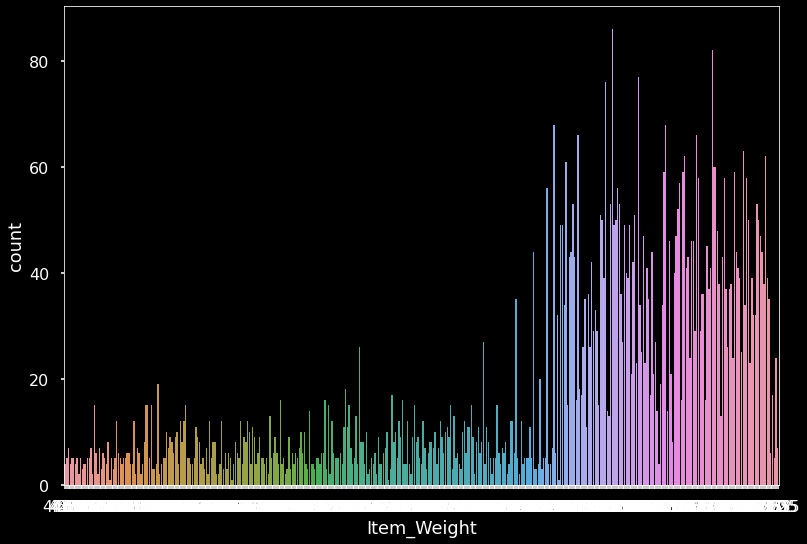

In [55]:
ax = sns.countplot(data = df, x = 'Item_Weight');

* For this column I chose to use the median for the missing values because weight is considered continous data type.

In [56]:
mean_age = df['Item_Weight'].median()
print(mean_age)



12.6


In [57]:
df['Item_Weight'] = df['Item_Weight'].fillna(value = '12.6')

df['Item_Weight'].value_counts()

12.6      1463
12.15       86
17.6        82
13.65       77
11.8        76
15.1        68
9.3         68
16.7        66
10.5        66
19.35       63
20.7        62
16.0        62
9.8         61
17.75       60
17.7        60
18.85       59
15.0        59
15.85       59
16.75       58
19.6        58
18.25       58
15.7        57
12.5        56
9.195       56
12.6        53
12.1        53
10.195      53
20.2        53
15.6        52
13.5        51
11.5        51
12.35       50
20.25       50
11.6        50
19.7        50
12.3        49
9.5         49
9.6         49
12.85       49
13.15       49
17.85       48
14.0        47
20.35       47
15.5        47
16.35       46
15.2        46
16.5        46
17.25       45
14.5        44
20.5        44
9.0         44
19.0        44
10.1        44
10.0        43
18.2        43
16.2        43
10.3        43
13.35       42
11.1        42
14.15       41
19.1        41
16.1        41
17.5        41
15.35       40
13.0        40
13.1        39
19.2      

In [58]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

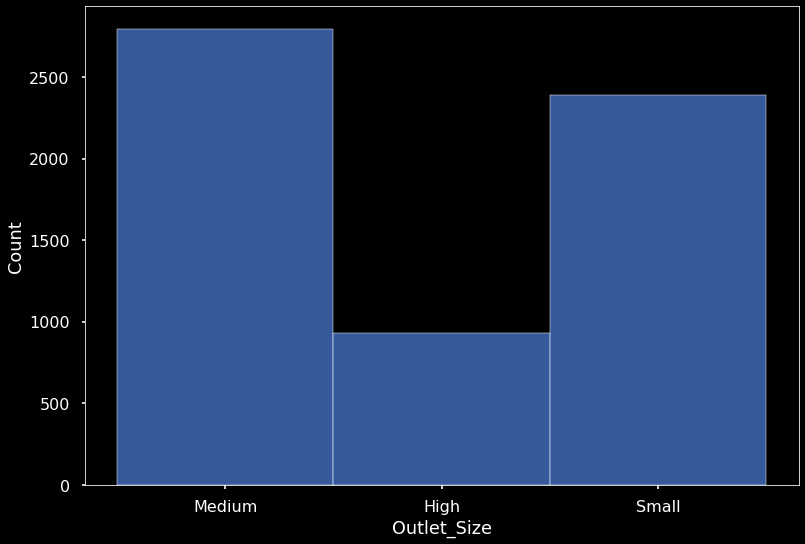

In [59]:
ax = sns.histplot(data = df, x = 'Outlet_Size')

* For this column I chose to use unknown for the missing values since this is categorical ordinal data type. I felt like using mode would provide inaccurate information. 

In [60]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(value = 'Unknown')
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [61]:
df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 799.2+ KB


In [62]:
pd.set_option('display.max_rows', None)
#df['Item_Weight'].value_counts()
     

* Commented last item ^ 

In [63]:
df['Item_Weight'] = df['Item_Weight'].astype('float')
#print(df['Item_Weight'])

* commented ^ print 

In [64]:

data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [65]:

for col in str_cols:
    print(f'- {col}:')
    #print(df[col].value_counts(dropna=False))
    #print("\n\n")

- Item_Identifier:
- Item_Fat_Content:
- Item_Type:
- Outlet_Identifier:
- Outlet_Size:
- Outlet_Location_Type:
- Outlet_Type:


In [66]:
Fat_Content = {'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'}
#print(Fat_Content)

#df['Item_fat_Content'] = df['Item_Fat_Content'].replace(Fat_Content)
new_Item_Fat_Content = df['Item_Fat_Content'].replace(['LF','low fat','reg'], ['Low Fat','Low Fat', 'Regular'])
#df['Item_Fat_Content'].replace(['LF','low fat','reg'], ['Low Fat','Low Fat', 'Regular'])
#print(df['Item_fat_Content'])
#df['Item_fat_Content'].head()
#print(new_Item_Fat_Content)

In [67]:
new_Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [68]:
#df.describe().round(2)

stats =  df.describe()
stats.loc[['mean','min','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
min,4.55500,0.000000,31.290000,1985.000000,33.290000
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Visuals

Text(0, 0.5, 'Items')

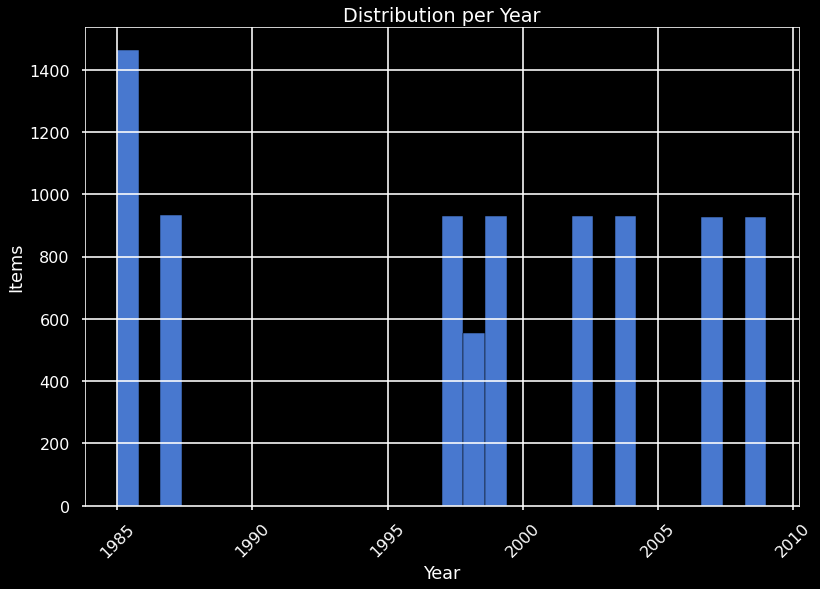

In [69]:
#Histogram
ax = df['Outlet_Establishment_Year'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.ticklabel_format(style='plain')
ax.set_title('Distribution per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Items')



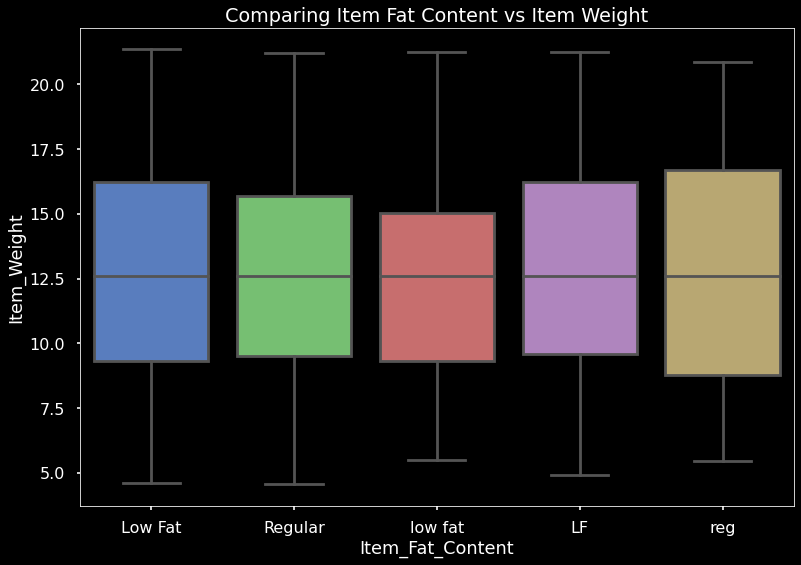

In [75]:
ax = sns.boxplot(x='Item_Fat_Content', y='Item_Weight', data=df)
ax.set_title("Comparing Item Fat Content vs Item Weight");


<Axes: >

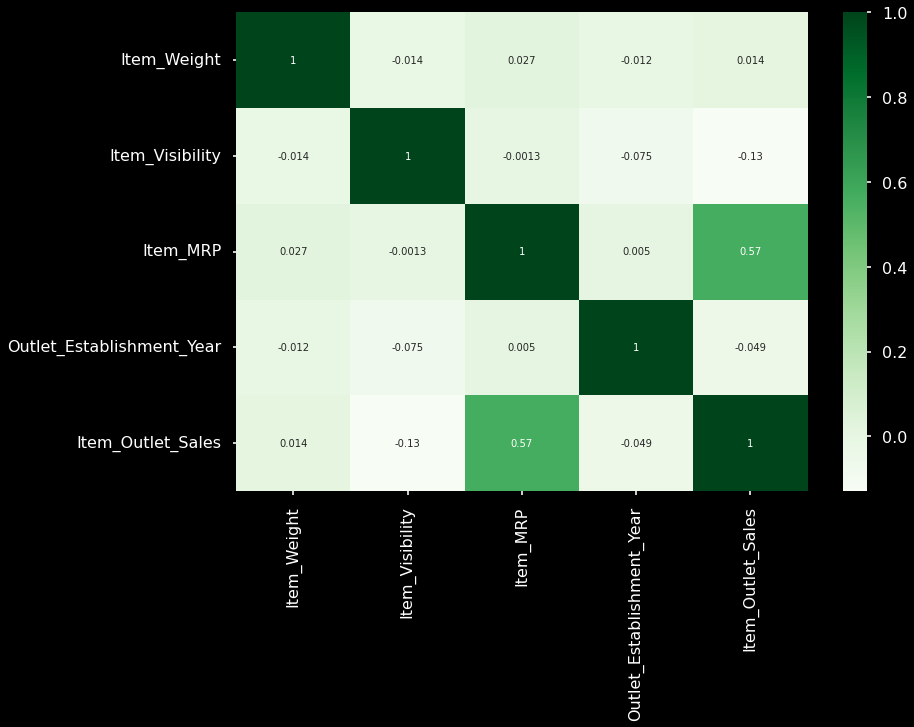

In [71]:
sns.heatmap(corr, cmap = 'Greens', annot = True)

## Explanatory Visuals